In [9]:
import pandas as pd
import numpy as np

In [3]:
""" TRATAMENTO """
 
df = pd.read_excel(r"C:\Users\guilherme.martinbian\Gui\CODES\economatica.xlsx", skiprows=3).replace('-', 0)

for col in df.columns[7:]:
  df[col] = pd.to_numeric(df[col], errors = 'ignore')


l = []
count = -1
for _ in df.columns:
  count += 1

  if count < 7:
    l.append(df.columns[count])
    continue
  
  l.append('|'.join(df.columns[count].split('\n')[:2]))

df.columns = l

# for col in df.columns:
#   print(col)

df = df.drop(df.columns[0], axis = 1)
df_ = df.melt(['Setor Econômico|Bovespa', 'Setor|Economatica', 'Subsetor Bovespa', 'Nome', 'Classe', 'Bolsa / Fonte', 'Tipo de Ativo', 'Ativo /\nCancelado', 'Código'])

df_[['var', 'date']] = df_['variable'].str.split('|', expand = True)
df_

# df_.to_csv(r'Acoes_.csv', sep = ';', decimal = ',', encoding = 'latin1')

,Setor Econômico|Bovespa,Setor|Economatica,Subsetor Bovespa,Nome,Classe,Bolsa / Fonte,Tipo de Ativo,Ativo /\nCancelado,Código,variable,value,var,date
0,Petróleo gás e biocombustíveis,Petróleo e Gas,Petróleo gás e biocombustíveis,3r Petroleum,ON,Bovespa,Ação,ativo,RRRP3,EBITDA| < Mar 2017,0.000000,EBITDA,< Mar 2017
1,Consumo não cíclico,Agro e Pesca,Agropecuária,3tentos,ON,Bovespa,Ação,ativo,TTEN3,EBITDA| < Mar 2017,0.000000,EBITDA,< Mar 2017
2,Outros,Energia Elétrica,Outros,524 Particip,ON,Bovespa,Ação,ativo,QVQP3B,EBITDA| < Mar 2017,-117.000000,EBITDA,< Mar 2017
3,Financeiro,Finanças e Seguros,Intermediários financeiros,Abc Brasil,PN,Bovespa,Ação,ativo,ABCB4,EBITDA| < Mar 2017,0.000000,EBITDA,< Mar 2017
4,Bens industriais,Siderur & Metalur,Máquinas e equipamentos,Aco Altona,PN,Bovespa,Ação,ativo,EALT4,EBITDA| < Mar 2017,10088.000000,EBITDA,< Mar 2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65662,Bens industriais,Transporte Serviç,Transporte,Wilson Sons,ON,Bovespa,Ação,ativo,PORT3,P/L|31Dez21,16.668864,P/L,31Dez21
65663,Financeiro,Finanças e Seguros,Previdência e seguros,Wiz S.A.,ON,Bovespa,Ação,ativo,WIZS3,P/L|31Dez21,6.977339,P/L,31Dez21
65664,Bens industriais,Comércio,Comércio,Wlm Ind Com,PN,Bovespa,Ação,ativo,WLMM4,P/L|31Dez21,15.528777,P/L,31Dez21
65665,Outros,Outros,Outros,Ybyra S/A,ON,Bovespa,Ação,ativo,YBRA3B,P/L|31Dez21,0.000000,P/L,31Dez21


In [10]:
""" DO """

df = pd.read_excel(r"C:\Users\Marti\Documents\Gui\PYTHON\me\ML - Economatica.xlsx", sheet_name = 'economatica_')

l = df.columns.tolist()
l.remove('var')
l.remove('value')
df.pivot(index = l, columns = 'var')

# df_ = df[(df['date_'] < '2022-01-01') & (df['Setor|Economatica'] != 0)].groupby(['Setor|Economatica', 'var', 'Código', 'date_']).sum().replace(0, np.nan).fillna(method = 'ffill').unstack(1).fillna(method = 'ffill')
df_setor = df[(df['date_'] < '2022-01-01') & (df['Setor|Economatica'] != 0)].groupby(['Setor|Economatica', 'var', 'date_']).sum().replace(0, np.nan).fillna(method = 'ffill').unstack(1).fillna(method = 'ffill')

df_setor['EV/EBITDA'] = df_setor[('value', 'EV')]/df_setor[('value', 'EBITDA')]
df_setor['ROIC'] = (df_setor[('value', 'EBITDA')]-df_setor[('value', 'ImpRen')])/(df_setor[('value'), 'Div Tt Lq']/1000+df_setor[('value'), 'Patrim Liq'])
# df_setor.loc[('Materiais básicos', 'VALE3')]

In [7]:
ROIC = df_.groupby(['Setor|Economatica', 'date_'])[[('EV/EBITDA', ''), ('ROIC', '')]].mean().unstack().transpose().loc['ROIC']
EB = df_.groupby(['Setor|Economatica', 'date_'])[[('EV/EBITDA', ''), ('ROIC', '')]].mean().unstack().transpose().loc['EV/EBITDA']

# ROIC.drop(['Outros'], axis = 1).plot(figsize = (20, 10))
# EB.drop(['Outros'], axis = 1).plot(figsize = (20, 10))

KeyError: "Columns not found: ('ROIC', ''), ('EV/EBITDA', '')"

In [12]:
ROIC

Setor|Economatica  Agro e Pesca  Alimentos e Beb  Comércio  Construção  \
var date_                                                                
    2016-12-01              NaN         0.195105  0.004248    0.145475   
    2017-03-01         0.058938         0.229035  0.119755         NaN   
    2017-06-01         0.105054         0.222269  0.119003         NaN   
    2017-09-01         0.141094         0.202436  0.115208         NaN   
    2017-12-01         0.122935         0.197742  0.234674         NaN   
    2018-03-01         0.171254         0.198959  0.195081         NaN   
    2018-06-01         0.185386         0.176785  0.205622         NaN   
    2018-09-01         0.196772         0.190874  0.190594         NaN   
    2018-12-01         0.159014         0.223589  0.236033   -0.013796   
    2019-03-01         0.145219         0.218937  0.190472    0.008296   
    2019-06-01         0.140648         0.245080  0.191246    0.021421   
    2019-09-01         0.104179         0.263817  0.203793    0.049175   
    2019-12-01         0.118636         0.286054  0.211414    0.069635   
    2020-03-01         0.112459         0.258220  0.117238    0.053463   
    2020-06-01         0.109362         0.278022  0.119296    0.056869   
    2020-09-01         0.128371         0.291088  0.130904    0.097307   
    2020-12-01         0.183219         0.309191  0.204488    0.104592   
    2021-01-01         0.183219         0.309191  0.204488    0.104592   
    2021-02-01         0.183219         0.309191  0.204488    0.104592   
    2021-03-01         0.194546         0.291695  0.182007    0.113523   
    2021-04-01         0.194546         0.291695  0.182007    0.113523   
    2021-05-01         0.194546         0.291695  0.182007    0.113523   
    2021-06-01         0.179134         0.296999  0.179574    0.124112   
    2021-07-01         0.179134         0.296999  0.179574    0.124112   
    2021-08-01         0.179134         0.296999  0.179574    0.124112   
    2021-09-01         0.195105         0.309157  0.145475    0.101237   
    2021-10-01         0.195105         0.309157  0.145475    0.101237   
    2021-11-01         0.195105         0.309157  0.145475    0.101237   
    2021-12-01         0.195105         0.004248  0.145475    0.101237   

Setor|Economatica  Eletroeletrônicos  Energia Elétrica  Finanças e Seguros  \
var date_                                                                    
    2016-12-01              0.101237          0.278815            0.189934   
    2017-03-01              0.186925          0.207971                 NaN   
    2017-06-01              0.165036          0.140906                 NaN   
    2017-09-01              0.148886          0.116038                 NaN   
    2017-12-01              0.290428          0.122499                 NaN   
    2018-03-01              0.208684          0.110620                 NaN   
    2018-06-01              0.196566          0.121641                 NaN   
    2018-09-01              0.194224          0.120413           -0.015022   
    2018-12-01              0.225599          0.160552                 NaN   
    2019-03-01              0.154159          0.122521                 NaN   
    2019-06-01              0.188738          0.116656                 NaN   
    2019-09-01              0.142186          0.122479                 NaN   
    2019-12-01              0.222200          0.140564                 NaN   
    2020-03-01              0.157114          0.135204           -0.012136   
    2020-06-01              0.211297          0.147659            0.002972   
    2020-09-01              0.330145          0.154843            0.005784   
    2020-12-01                   NaN          0.170327            0.003058   
    2021-01-01                   NaN          0.170327            0.003058   
    2021-02-01                   NaN          0.170327            0.003058   
    2021-03-01              0.354514          0.174057             

In [13]:
EB

Setor|Economatica  Agro e Pesca  Alimentos e Beb   Comércio  Construção  \
var date_                                                                 
    2016-12-01              NaN              NaN        NaN         NaN   
    2017-03-01         9.827460        11.011920  12.047471         NaN   
    2017-06-01         5.483494        11.101990  12.227728         NaN   
    2017-09-01         4.400759        11.068963  11.255840         NaN   
    2017-12-01         6.046537        12.976053  10.795105         NaN   
    2018-03-01         4.784032        12.488108  12.119020         NaN   
    2018-06-01         4.098736        12.786254  11.556010         NaN   
    2018-09-01         3.841606        12.896116  11.752725         NaN   
    2018-12-01         5.795430        10.274371  11.060696         NaN   
    2019-03-01         6.795000         9.929843  12.258572         NaN   
    2019-06-01         6.377312         8.890015  12.683860         NaN   
    2019-09-01         8.529108         7.934641  11.417305   19.011747   
    2019-12-01         7.759196         9.295541  15.474701   22.266203   
    2020-03-01         7.948821         9.120132  19.409874   28.412242   
    2020-06-01         7.717062         8.096754  18.011134   26.208036   
    2020-09-01         6.953268         7.783847  15.752577   15.360382   
    2020-12-01         4.575485         6.387149  17.178118   14.196115   
    2021-01-01         5.350749         6.231365  17.049360   13.773822   
    2021-02-01         6.136363         6.044262  16.595671   12.631005   
    2021-03-01         5.559797         6.367696  16.160278   11.658889   
    2021-04-01         7.283545         6.229140  16.509321   11.641366   
    2021-05-01         7.902121         6.950132  17.342164   11.709710   
    2021-06-01         6.568673         6.590455  17.083371   10.466677   
    2021-07-01         9.570519         6.571421  16.810485    9.629398   
    2021-08-01         8.786014         6.625563  15.940186    9.019114   
    2021-09-01         8.090804         5.842214  16.009048    9.753594   
    2021-10-01         7.579399         6.184072  13.915408    8.481929   
    2021-11-01         7.250538         5.790532  12.193960    8.385432   
    2021-12-01         8.497153              NaN  12.065377    9.054256   

Setor|Economatica  Eletroeletrônicos  Energia Elétrica  Finanças e Seguros  \
var date_                                                                    
    2016-12-01                   NaN               NaN                 NaN   
    2017-03-01              8.146092          4.759742           10.895318   
    2017-06-01              8.896599          6.756724            9.667364   
    2017-09-01             11.108618          7.811184            7.288592   
    2017-12-01              8.825955          7.412033           12.054729   
    2018-03-01             11.258244          7.868994           10.677056   
    2018-06-01             12.690130          6.967133            8.817335   
    2018-09-01             12.621409          6.825560            8.056993   
    2018-12-01              7.831512          6.237456           10.057510   
    2019-03-01             11.136871          8.181241            9.563496   
    2019-06-01              8.016613          8.063412            9.542529   
    2019-09-01              8.376191          7.560907            9.170336   
    2019-12-01             11.169565          8.660627           15.793155   
    2020-03-01             18.421333          8.713687           14.512993   
    2020-06-01             24.062342          7.938897           12.571797   
    2020-09-01             15.408814          7.623630           11.002665   
    2020-12-01              4.789004          7.234637           10.634121   
    2021-01-01              4.696189          6.982883           10.160597   
    2021-02-01              6.980648          6.853481            8.834013   
    2021-03-01              8.156297

<AxesSubplot:xlabel='var,date_'>

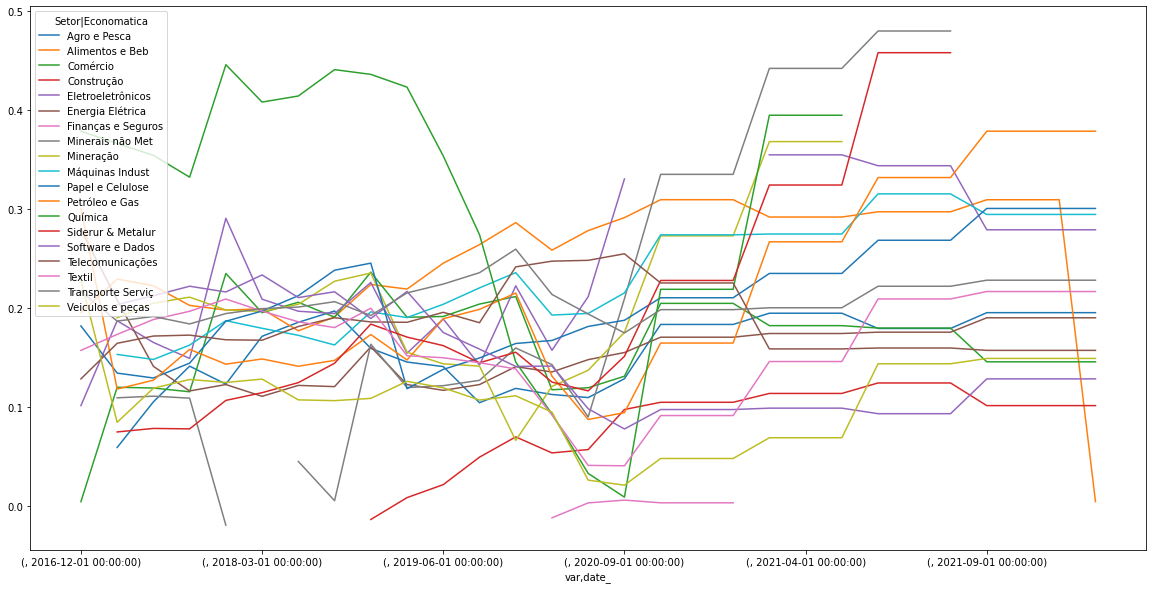

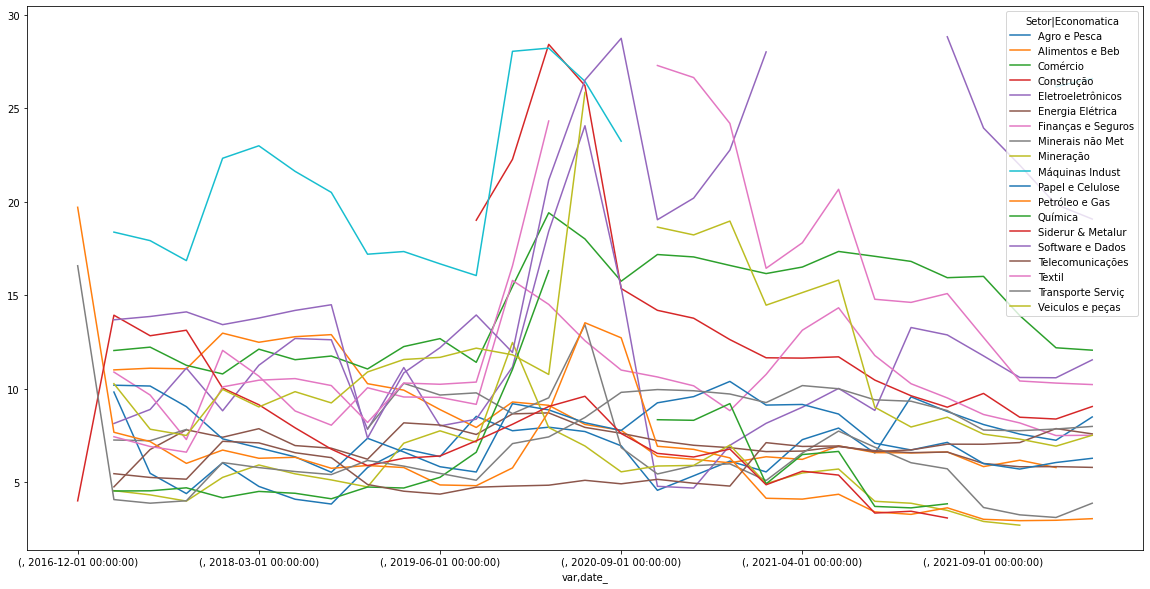

In [11]:
# SINGLE

df_[('ROIC', '')].where(df_[('ROIC', '')]<df_[('ROIC', '')].quantile(0.95), inplace = True)
df_[('ROIC', '')].where(df_[('ROIC', '')]>df_[('ROIC', '')].quantile(0.05), inplace = True)
df_[('EV/EBITDA', '')].where(df_[('EV/EBITDA', '')]>df_[('EV/EBITDA', '')].quantile(0.05), inplace = True)
df_[('EV/EBITDA', '')].where(df_[('EV/EBITDA', '')]<df_[('EV/EBITDA', '')].quantile(0.95), inplace = True)

ROIC = df_.groupby(['Setor|Economatica', 'date_'])[[('EV/EBITDA', ''), ('ROIC', '')]].mean().unstack().transpose().loc['ROIC']
EB = df_.groupby(['Setor|Economatica', 'date_'])[[('EV/EBITDA', ''), ('ROIC', '')]].mean().unstack().transpose().loc['EV/EBITDA']

ROIC.drop(['Outros'], axis = 1).plot(figsize = (20, 10))
EB.drop(['Outros'], axis = 1).plot(figsize = (20, 10))

# df_[('ROIC', '')].quantile(0.95)
# df_[('EV/EBITDA', '')].quantile(0.05)